# Visualizing Fifa-18 Dataset

Dataset source: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 1. Read Data

In [3]:
df = pd.read_csv('fifa18-cleaned.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Index,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228.0,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,76.0,7.0,11.0,15.0,14.0,11.0,88.0,29.0,95.0,77.0,92.0,22.0,85.0,95.0,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,89.0,53.0,62.0,91.0,82.0,20801.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,ST
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154.0,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,90.0,6.0,11.0,15.0,14.0,8.0,71.0,22.0,68.0,87.0,88.0,13.0,74.0,93.0,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,92.0,45.0,59.0,92.0,84.0,158023.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,RW
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100.0,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,84.0,9.0,9.0,15.0,15.0,11.0,62.0,36.0,61.0,75.0,77.0,21.0,81.0,90.0,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,88.0,46.0,59.0,88.0,79.0,190871.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,LW
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291.0,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,84.0,27.0,25.0,31.0,33.0,37.0,77.0,41.0,69.0,64.0,86.0,30.0,85.0,92.0,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,87.0,58.0,65.0,88.0,80.0,176580.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,ST
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493.0,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,11.0,91.0,90.0,95.0,91.0,89.0,25.0,30.0,78.0,59.0,16.0,10.0,47.0,12.0,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,NaN,NaN,NaN,NaN,NaN,167495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Index                17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  float64
 13  Acceleration         17981 non-null  float64
 14  Aggression           17981 non-null  float64
 15  Agility              17981 non-null 

In [6]:
df.describe()

,Index,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,64.600578,55.822257,63.342417,63.815528,58.109838,57.896057,49.781380,47.311996,55.067238,45.299538,43.179968,16.737779,16.513709,16.391914,16.501196,16.867249,52.343196,46.559924,64.900895,52.453812,47.218620,44.111117,48.988710,49.654191,61.904844,58.302931,55.661031,45.572048,64.832212,63.261109,47.446026,65.291363,53.022635,43.227852,59.251755,55.550464,56.865283,59.030028,58.506833,207658.710138,59.251755,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,59.251755,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,14.907052,17.468440,14.791361,14.094377,16.799127,12.926942,18.459139,18.461347,18.991248,19.475738,17.577351,17.790776,17.013013,16.605478,17.128074,18.082975,17.410172,20.682663,11.884725,15.535665,19.282551,21.576320,15.812455,19.437103,9.171952,14.922538,17.398559,21.484684,14.637391,15.922908,21.834465,12.617383,14.387463,17.735041,9.880164,12.192579,10.310178,9.926988,8.888040,32291.667313,9.880164,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.880164,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,13.000000,7.000000,3.000000,4.000000,5.000000,2.000000,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000,27.000000,25.000000,26.000000,27.000000,30.000000,16.000000,27.000000,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,27.000000,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,38.000000,34.000000,48.000000,29.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000,45.000000,26.000000,58.000000,42.000000,32.000000,22.000000,39.000000,38.000000,55.000000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000,53.000000,45.000000,49.000000,53.000000,53.000000,192622.000000,53.000000,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,53.000000,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.00000

## 2. Visualization

In [7]:
df['Position'].unique()

array(['ST', 'RW', 'LW', 'GK', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM',
       'RB', 'CF', 'RWB', 'LWB'], dtype=object)

- GK: GoalKeeper 
- ST: Striker 
- CF: Center-Forward
- RW: Right Winger 
- LW: Left Winger
- CDM: Central Defensive Midfielder 
- RM: Right Midfielder 
- CM: Center Midfielder 
- CAM: Center Attack Midfielder
- LM: Left Midfielder
- CB: Center-Back 
- LB: Left-Back
- RB: Right-Back
- RWB: Right-Wing-Back
- LWB: Left-Wing-Back


In [8]:
df.sort_values(by='Overall', ascending=False)

,Index,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228.0,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,76.0,7.0,11.0,15.0,14.0,11.0,88.0,29.0,95.0,77.0,92.0,22.0,85.0,95.0,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,89.0,53.0,62.0,91.0,82.0,20801.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,ST
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154.0,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,90.0,6.0,11.0,15.0,14.0,8.0,71.0,22.0,68.0,87.0,88.0,13.0,74.0,93.0,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,92.0,45.0,59.0,92.0,84.0,158023.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,RW
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100.0,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,84.0,9.0,9.0,15.0,15.0,11.0,62.0,36.0,61.0,75.0,77.0,21.0,81.0,90.0,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,88.0,46.0,59.0,88.0,79.0,190871.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,LW
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291.0,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,84.0,27.0,25.0,31.0,33.0,37.0,77.0,41.0,69.0,64.0,86.0,30.0,85.0,92.0,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,87.0,58.0,65.0,88.0,80.0,176580.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,ST
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493.0,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,11.0,91.0,90.0,95.0,91.0,89.0,25.0,30.0,78.0,59.0,16.0,10.0,47.0,12.0,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,NaN,NaN,NaN,NaN,NaN,167495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,€50K,€1K,755.0,24.0,16.0,38.0,26.0,12.0,23.0,14.0,13.0,12.0,5.0,12.0,46.0,47.0,49.0,42.0,48.0,10.0,9.0,31.0,21.0,7.0,9.0,17.0,6.0,40.0,19.0,19.0,10.0,32.0,28.0,11.0,50.0,26.0,6.0,NaN,NaN,NaN,NaN,NaN,237463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
17977,17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.or

### Players age range

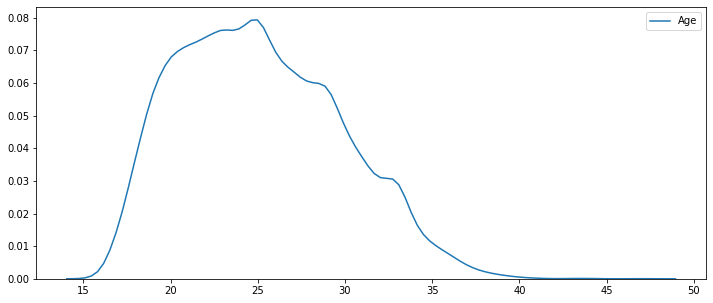

In [9]:
plt.figure(figsize=(12,5))
sns.kdeplot(df['Age'])

### Players age for every Position

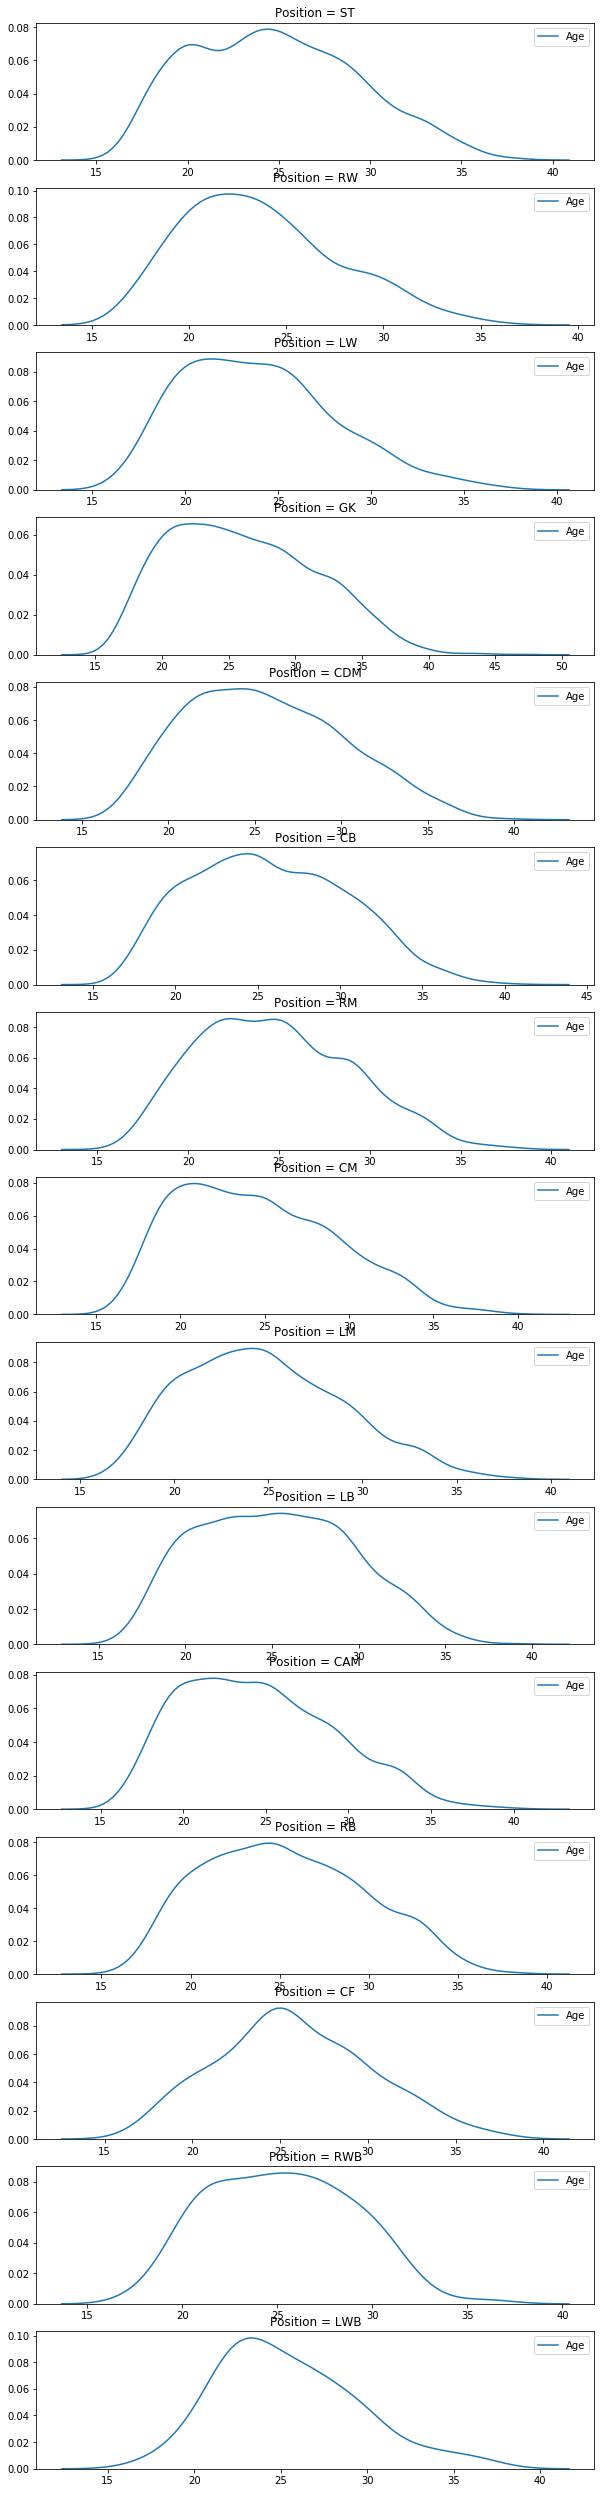

In [10]:
unique_positions = df['Position'].unique()
npositions = unique_positions.size

fig, axes = plt.subplots(figsize=(10,3*npositions), nrows=npositions, ncols=1)
for i in range(npositions):
    pos = unique_positions[i]
    data = df[df['Position']==pos]['Age']
    axes[i].set_title('Position = '+ pos)
    sns.kdeplot(data=data, ax=axes[i])

### Using FacetGrid

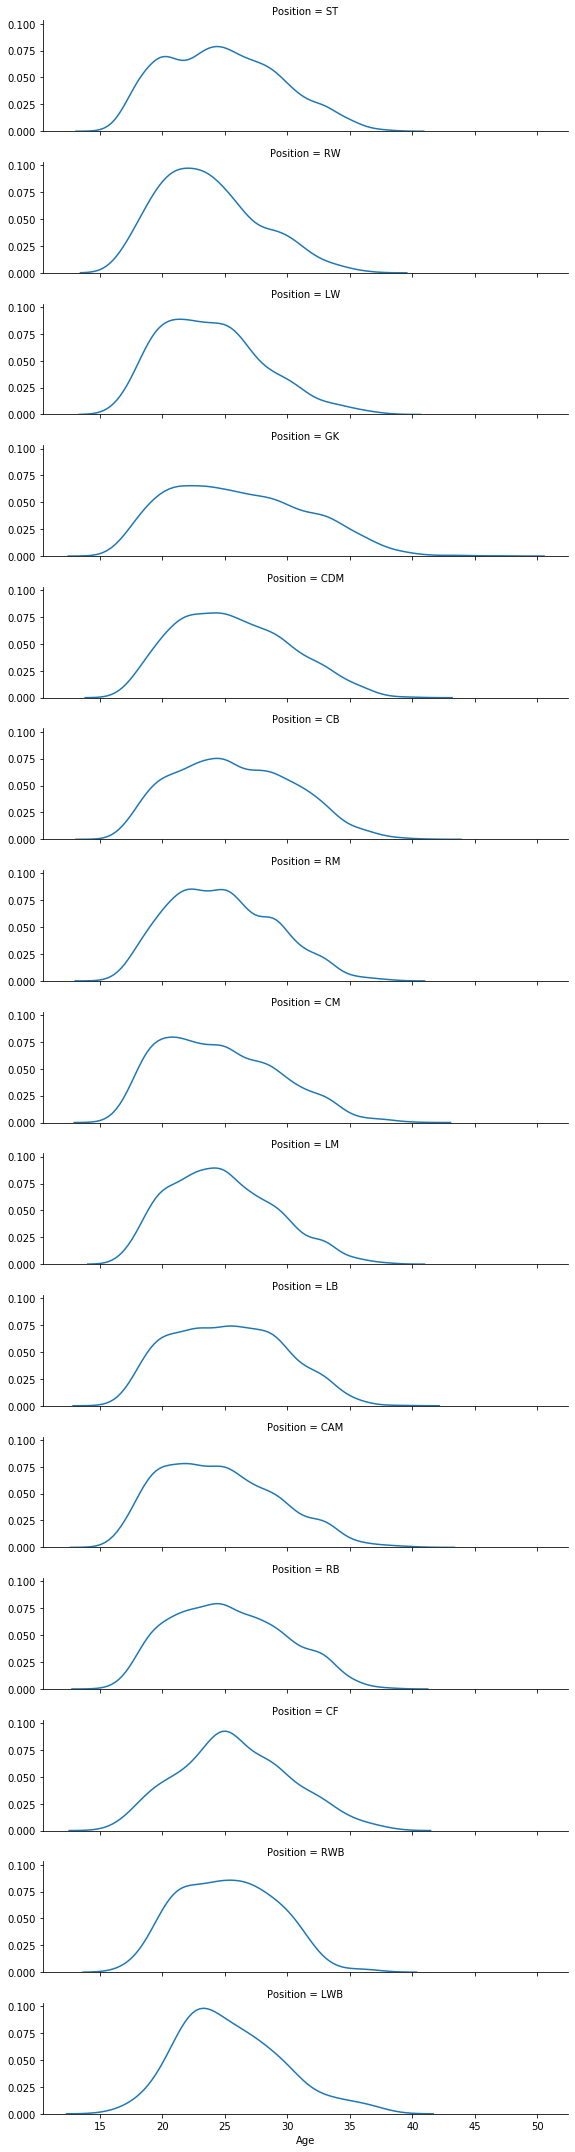

In [11]:
g = sns.FacetGrid(df, row='Position', height=2, aspect=4)
g.map(sns.kdeplot, "Age")

### Age vs Rank

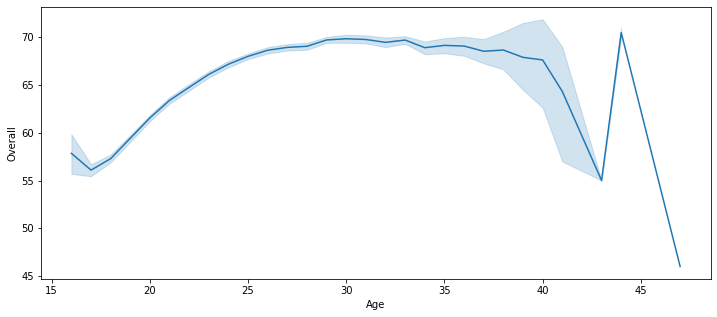

In [8]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='Age',y='Overall',estimator='mean',ci=None)

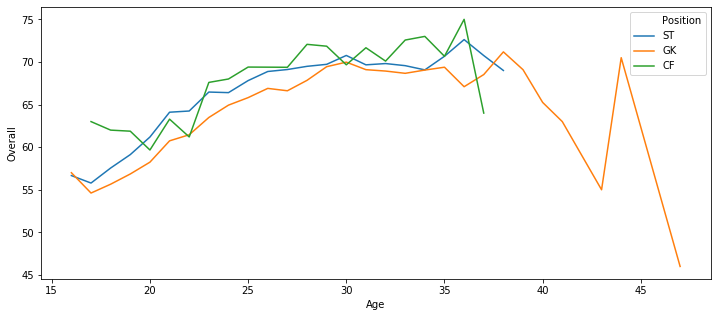

In [10]:
data = df[df['Position'].isin(['GK','ST','CF'])]

plt.figure(figsize=(12,5))
sns.lineplot(data=data, x='Age',y='Overall',estimator='mean',ci=None, hue='Position')

### Players by Nationality

Top 20

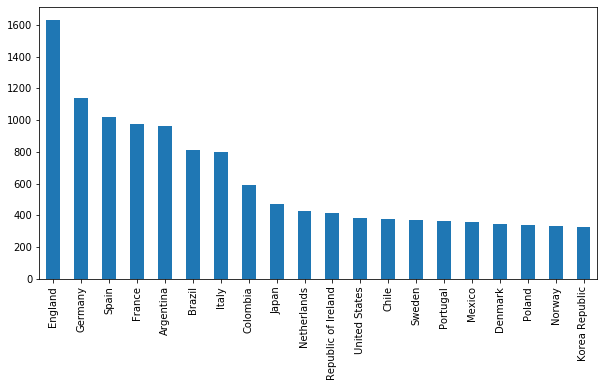

In [14]:
plt.figure(figsize=(10,5))
df['Nationality'].value_counts()[:20].plot.bar()

In [15]:
top20countries = list(df['Nationality'].value_counts()[:20].index)
top20countries

['England',
 'Germany',
 'Spain',
 'France',
 'Argentina',
 'Brazil',
 'Italy',
 'Colombia',
 'Japan',
 'Netherlands',
 'Republic of Ireland',
 'United States',
 'Chile',
 'Sweden',
 'Portugal',
 'Mexico',
 'Denmark',
 'Poland',
 'Norway',
 'Korea Republic']

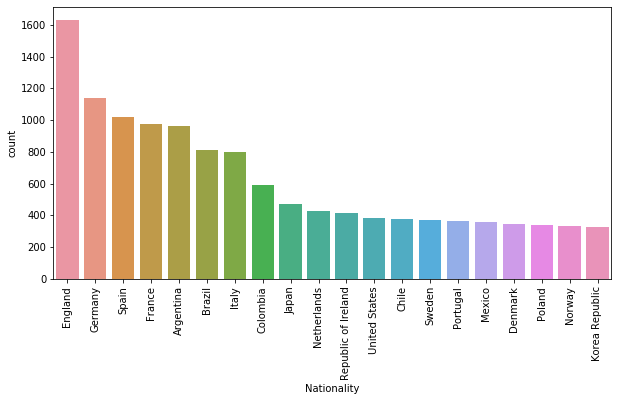

In [16]:
plt.figure(figsize=(10,5))
chart = sns.countplot(df[df['Nationality'].isin(top20countries)]['Nationality'], order=top20countries)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Top 50 Teams

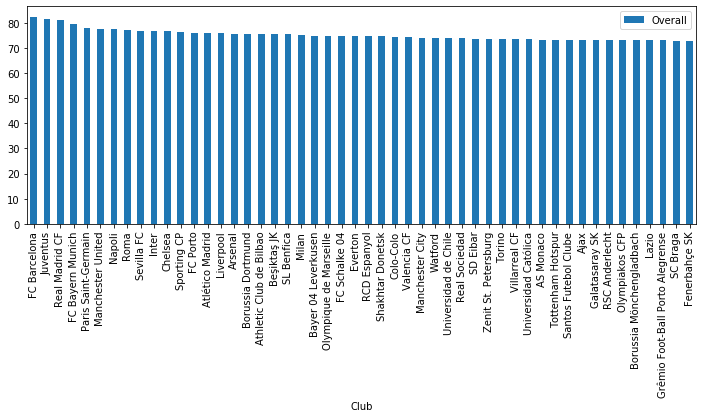

In [17]:
fig, ax = plt.subplots(figsize=(12,4))
top50clubs = df[['Club','Overall']].groupby('Club').mean().sort_values(by='Overall', ascending=False)[:50]
top50clubs.plot.bar(ax=ax)

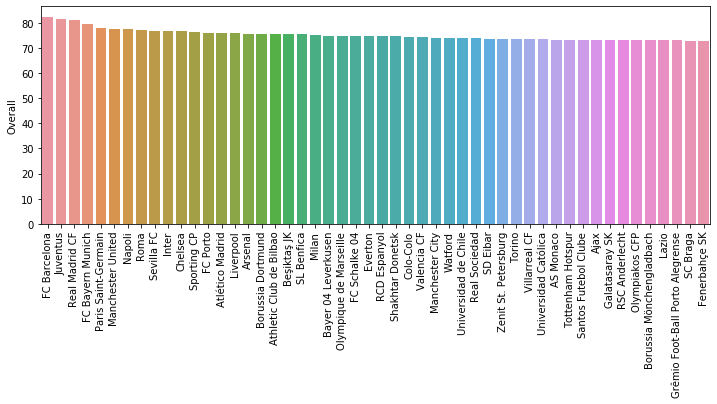

In [18]:
plt.figure(figsize=(12,4))
chart = sns.barplot(x=top50clubs.index.values, y=top50clubs['Overall'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Fix Values

In [19]:
column = 'Value'

for i in range(df.shape[0]):
    value = str(df.loc[i,column]).replace('€','')
    if value.endswith('M'):
        value=float(value[:-1])
    elif value.endswith('K'):
        value=float(value[:-1]) / 1000
    df.loc[i,column] = value

In [20]:
df['Value'] = df['Value'].astype('float64')

In [21]:
df['Value'].dtype

dtype('float64')

In [22]:
column = 'Wage'

for i in range(df.shape[0]):
    value = str(df.loc[i,column]).replace('€','')
    if value.endswith('K'):
        value=float(value[:-1])
    df.loc[i,column] = value

In [23]:
df['Wage'] = df['Wage'].astype('float64')

In [24]:
df['Wage'].dtype

dtype('float64')

In [25]:
df.head()

,Index,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,565.0,2228.0,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,76.0,7.0,11.0,15.0,14.0,11.0,88.0,29.0,95.0,77.0,92.0,22.0,85.0,95.0,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,89.0,53.0,62.0,91.0,82.0,20801.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,ST
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,565.0,2154.0,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,90.0,6.0,11.0,15.0,14.0,8.0,71.0,22.0,68.0,87.0,88.0,13.0,74.0,93.0,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,92.0,45.0,59.0,92.0,84.0,158023.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,RW
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,280.0,2100.0,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,84.0,9.0,9.0,15.0,15.0,11.0,62.0,36.0,61.0,75.0,77.0,21.0,81.0,90.0,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,88.0,46.0,59.0,88.0,79.0,190871.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,LW
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,510.0,2291.0,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,84.0,27.0,25.0,31.0,33.0,37.0,77.0,41.0,69.0,64.0,86.0,30.0,85.0,92.0,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,87.0,58.0,65.0,88.0,80.0,176580.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,ST
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,230.0,1493.0,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,11.0,91.0,90.0,95.0,91.0,89.0,25.0,30.0,78.0,59.0,16.0,10.0,47.0,12.0,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,NaN,NaN,NaN,NaN,NaN,167495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK


### Plot Values

Text(0.5, 0, 'Wage in €K')

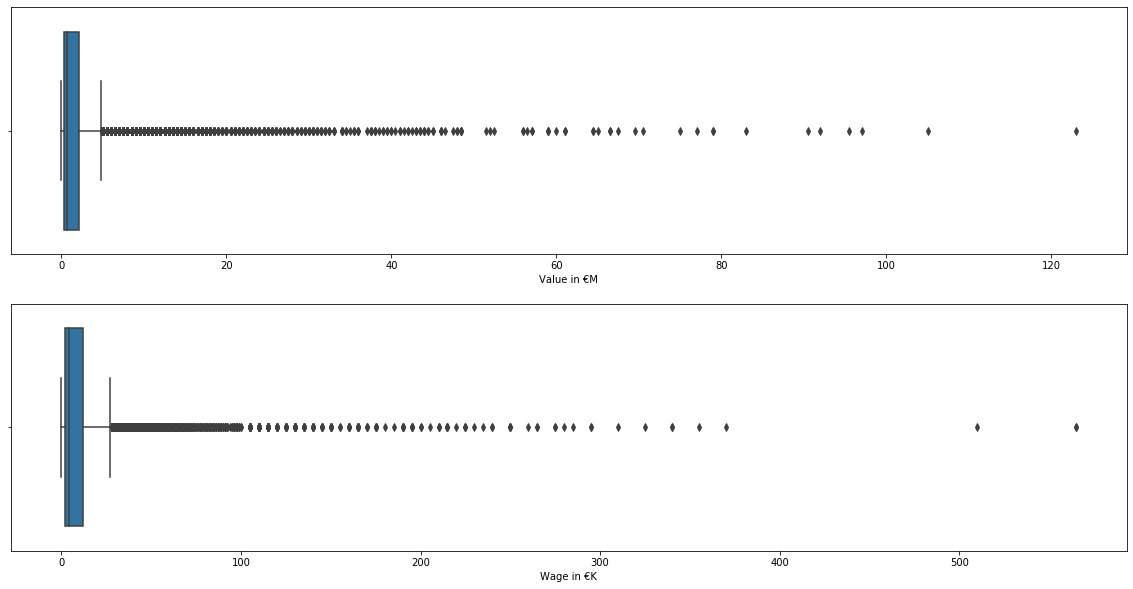

In [26]:
fig, axes = plt.subplots(figsize=(20,10), nrows=2)
sns.boxplot(data=df, x='Value', ax=axes[0]); axes[0].set_xlabel('Value in €M')
sns.boxplot(data=df, x='Wage', ax=axes[1]); axes[1].set_xlabel('Wage in €K')

In [27]:
df[['Name','Value', 'Wage']].sort_values(by='Value', ascending=False).head()

,Name,Value,Wage
2,Neymar,123.0,280.0
1,L. Messi,105.0,565.0
3,L. Suárez,97.0,510.0
0,Cristiano Ronaldo,95.5,565.0
5,R. Lewandowski,92.0,355.0


In [28]:
df[['Name','Value', 'Wage']].sort_values(by='Wage', ascending=False).head()

,Name,Value,Wage
0,Cristiano Ronaldo,95.5,565.0
1,L. Messi,105.0,565.0
3,L. Suárez,97.0,510.0
15,G. Bale,69.5,370.0
5,R. Lewandowski,92.0,355.0


### Wage vs Value

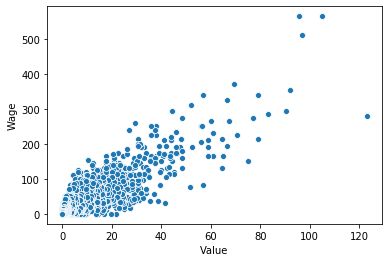

In [29]:
sns.scatterplot(data=df, x='Value', y='Wage')

### Wage, Value vs Overall

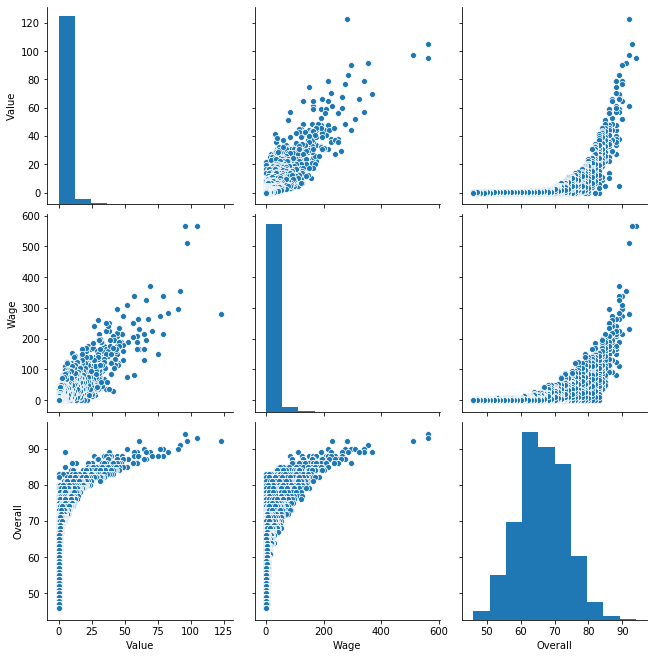

In [30]:
sns.pairplot(data=df[['Value', 'Wage', 'Overall']], height=3)